In [1]:
import keras
keras.__version__
import os
from __future__ import division, print_function
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_dir = 'D:\Load预测'
fname = os.path.join(data_dir, 'data.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:69714]  #43801

print(header)
print(len(lines))

import numpy as np

float_data_qian = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data_qian[i, :] = values

D:\TAO2018\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['time', 'load', 'T1', 'T2', 'T3', 'T4', 'is.holiday', 'weekday', 'timeofday', 'yest.load', 'last.hour.load', 'last.week.load', 'dayofyear', 'yest.mean', 'yest.min', 'EMA12', 'EMA24', 'EMA48', 'EMA168', 'Target']
69713


In [2]:
temp = float_data_qian[:, 18]  #目标

# 决策树

In [3]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:60594].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:60594].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,1]
y = float_data[:,18]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#X = float_data   #注意 ！！！！！这里错啦  怎么能把目标值放在训练集，目标无法获取啊
X = float_data[:, :18]   #这里把target去掉了
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.874356 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #############################################################################


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# Fit regression model
rng = np.random.RandomState(1)

clf = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
clf.fit(X_train, y_train)

# make a prediction set using the test set
prediction = clf.predict(X_test)
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error  
#print("The Explained Variance: %.2f" , regressor.score(X_test, y_test))  
print("The Mean Absolute Error: " , mean_absolute_error(y_test, prediction))  
print("The mean squared Error: "  , mean_squared_error(y_test, prediction))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, prediction))



(69713, 18) (69713,) (19,) (19,)
(60953, 18) (8760, 18) (60953,) (8760,)
The Mean Absolute Error:  0.16016794722224792
The mean squared Error:  0.08311964865634959
03The MAPE:  85.53560999453396


01The MAE:  1446.1153847031962
02The MSE:  6775765.584501986
03The MAPE:  3.2262572840324957


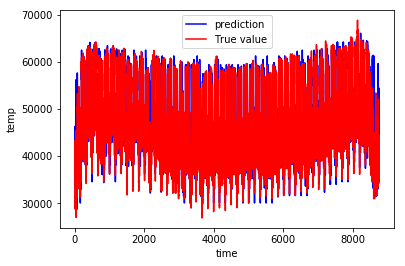

In [4]:
#***********************************还原数据******************************************#
prediction=prediction * std[18]
prediction=prediction + mean[18]

print("01The MAE: " , mean_absolute_error(temp[60953:], prediction))  
print("02The MSE: "  , mean_squared_error(temp[60953:], prediction))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[60953:], prediction))

plt.plot( prediction,'b', label='prediction')
plt.plot( temp[60953:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

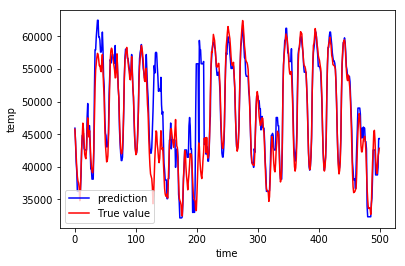

In [8]:
plt.plot( prediction[2000:2500],'b', label='prediction')
plt.plot( temp[60953+2000:60953+2500], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [ ]:
import numpy  
numpy.savetxt('结果.csv', prediction, delimiter = ',')

# SVR

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:60594].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:60594].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,1]
y = float_data[:,18]


X = float_data[:, :18]   #这里把target去掉了


print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.874356 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #############################################################################
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=32, gamma=0.05515674)
svr_rbf.fit(X_train, y_train)
y_rbf = svr_rbf.predict(X_test)
#y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error    
print("01The MAE: " , mean_absolute_error(y_test, y_rbf))  
print("02The MSE: "  , mean_squared_error(y_test, y_rbf))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, y_rbf))

plt.plot( y_rbf,'b', label='y_rbf')
plt.plot( y_test, 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()


In [ ]:
#***********************************还原数据******************************************#
y_rbf=y_rbf * std[18]
y_rbf=y_rbf + mean[18]

print("01The MAE: " , mean_absolute_error(temp[60953:], y_rbf))  
print("02The MSE: "  , mean_squared_error(temp[60953:], y_rbf))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[60953:], y_rbf))

plt.plot( y_rbf,'b', label='y_rbf')
plt.plot( temp[60953:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [ ]:
import numpy  
numpy.savetxt('SVR结果.csv', y_rbf, delimiter = ',')

# 计算MAPE

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("01The Mean Absolute Error: " , mean_absolute_percentage_error(y_test, y_rbf)) 

In [ ]:
# show some predictions

ytest_ = svr_rbf.predict(X_test)
plt.plot(ytest_)
plt.show()
print('预测总长度',len(ytest_))


print(std[18])
print(mean[18])
#***********************************还原数据******************************************#
ytest_=ytest_ * std[18]
ytest_=ytest_ + mean[18]
plt.plot(ytest_)
plt.show()

In [ ]:
import numpy  
numpy.savetxt('forecasting_SVR.csv', ytest_, delimiter = ',') 

In [ ]:
plt.plot( ytest_[7335:7382],'b', label='predicted value')
plt.plot( temp[68288:68335], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("load")
plt.legend(loc="best")
plt.show()

In [ ]:
print("01The Mean Absolute Error: " , mean_absolute_percentage_error(y_test, y_rbf))

# Gradient Boosting Regression

In [3]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from sklearn.model_selection import train_test_split  
# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
mean = float_data_qian[:60594].mean(axis=0)
float_data =float_data_qian- mean
std = float_data_qian[:60594].std(axis=0)
float_data = float_data/std

target = float_data_qian[:,1]
y = float_data[:,18]


X = float_data[:, :18]   #这里把target去掉了



print(X.shape, y.shape, mean.shape, std.shape)

train_size = int(0.874356 * X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(69713, 18) (69713,) (19,) (19,)
(60953, 18) (8760, 18) (60953,) (8760,)


In [4]:


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Fit regression model
alpha = 0.9
#clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
#                                n_estimators=100, max_depth=3,
#                                learning_rate=.1, min_samples_leaf=15,
#                                min_samples_split=15)
clf = GradientBoostingRegressor(loss='ls', alpha=alpha, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)

# make a prediction set using the test set
# Predict

y_2 = clf.predict(X_test)
# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error  
#print("The Explained Variance: %.2f" , regressor.score(X_test, y_test))  
print("The Mean Absolute Error: " , mean_absolute_error(y_test, y_2))  
print("The mean squared Error: "  , mean_squared_error(y_test, y_2))
print("03The MAPE: "  , mean_absolute_percentage_error(y_test, y_2))

The Mean Absolute Error:  0.1775210385119437
The mean squared Error:  0.07300554199367508
03The MAPE:  96.29948223990016


01The MAE:  1602.792002724448
02The MSE:  5951281.639360852
03The MAPE:  3.6045076462251933


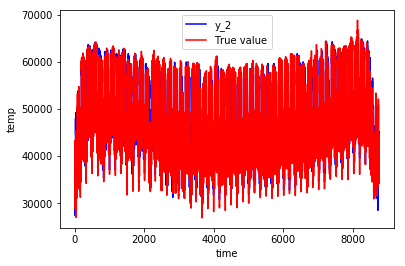

In [5]:
#***********************************还原数据******************************************#
y_2=y_2 * std[18]
y_2=y_2 + mean[18]

print("01The MAE: " , mean_absolute_error(temp[60953:], y_2))  
print("02The MSE: "  , mean_squared_error(temp[60953:], y_2))
print("03The MAPE: "  , mean_absolute_percentage_error(temp[60953:], y_2))

plt.plot( y_2,'b', label='y_2')
plt.plot( temp[60953:], 'r', label='True value')
plt.xlabel("time")
plt.ylabel("temp")
plt.legend(loc="best")
plt.show()

In [6]:
import numpy  
numpy.savetxt('GBR结果.csv', y_2, delimiter = ',')